# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={api_key}&q=" 
requests.get(url + "Dhaka").json()


{'coord': {'lon': 90.41, 'lat': 23.71},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 59,
  'feels_like': 57.43,
  'temp_min': 59,
  'temp_max': 59,
  'pressure': 1018,
  'humidity': 87},
 'visibility': 1600,
 'wind': {'speed': 5.61, 'deg': 353},
 'clouds': {'all': 20},
 'dt': 1580607962,
 'sys': {'type': 1,
  'id': 9145,
  'country': 'BD',
  'sunrise': 1580603941,
  'sunset': 1580643888},
 'timezone': 21600,
 'id': 1185241,
 'name': 'Dhaka',
 'cod': 200}

In [30]:
# variable creation
country = []
cityName = []
dt =[]
clouds = []
humidity = []
latitude = []
longitude = []
maxTemp = []
windSpeed = []
x = 1

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    try:
        response = requests.get(url + city).json()
        print(f'Processing Record {x} | {city}')
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        clouds.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response['wind']['speed'])
        x += 1
        cityName.append(city)
       
            
    except:
        print('City' + '\033[1m' + ' not ' + '\033[0m' + 'found. Skipping...')
        pass
    

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | souillac
Processing Record 2 | ushuaia
Processing Record 3 | hilo
Processing Record 4 | sur
Processing Record 5 | taolanaro
City not found. Skipping...
Processing Record 5 | albany
Processing Record 6 | hobart
Processing Record 7 | samusu
City not found. Skipping...
Processing Record 7 | kodiak
Processing Record 8 | new norfolk
Processing Record 9 | busselton
Processing Record 10 | vaini
Processing Record 11 | lazaro cardenas
Processing Record 12 | big spring
Processing Record 13 | saint-philippe
Processing Record 14 | port alfred
Processing Record 15 | cordoba
Processing Record 16 | polovinnoye
Processing Record 17 | kenai
Processing Record 18 | magalia
Processing Record 19 | chimbote
Processing Record 20 | bluff
Processing Record 21 | mehamn
Processing Record 22 | sentyabrskiy
City not found. Skipping...
Processing Record 22 | yenagoa
Processing Record 23 | amderma
City not found. Skipping...
Processing Reco

Processing Record 208 | sulangan
Processing Record 209 | waipawa
Processing Record 210 | leningradskiy
Processing Record 211 | lidkoping
Processing Record 212 | tasiilaq
Processing Record 213 | norman wells
Processing Record 214 | kautokeino
Processing Record 215 | nizhneyansk
City not found. Skipping...
Processing Record 215 | bonito
Processing Record 216 | iquitos
Processing Record 217 | toftir
City not found. Skipping...
Processing Record 217 | hasaki
Processing Record 218 | catalao
Processing Record 219 | half moon bay
Processing Record 220 | shaoyang
Processing Record 221 | hofn
Processing Record 222 | opuwo
Processing Record 223 | galchino
City not found. Skipping...
Processing Record 223 | korla
Processing Record 224 | hobyo
Processing Record 225 | gualaquiza
Processing Record 226 | buchanan
Processing Record 227 | kegayli
City not found. Skipping...
Processing Record 227 | rungata
City not found. Skipping...
Processing Record 227 | menongue
Processing Record 228 | timmins
Proce

Processing Record 410 | kaeo
Processing Record 411 | jieshi
Processing Record 412 | turan
Processing Record 413 | copiapo
Processing Record 414 | jonuta
Processing Record 415 | winona
Processing Record 416 | sinop
Processing Record 417 | sisimiut
Processing Record 418 | virginia beach
Processing Record 419 | gat
Processing Record 420 | tiksi
Processing Record 421 | gao
Processing Record 422 | ust-kamchatsk
City not found. Skipping...
Processing Record 422 | kamaishi
Processing Record 423 | camacha
Processing Record 424 | agidel
Processing Record 425 | vestmannaeyjar
Processing Record 426 | ondarroa
Processing Record 427 | tungkang
City not found. Skipping...
Processing Record 427 | machico
Processing Record 428 | saint-augustin
Processing Record 429 | ciudad del maiz
Processing Record 430 | juifang
City not found. Skipping...
Processing Record 430 | miraflores
Processing Record 431 | mason city
Processing Record 432 | preetz
Processing Record 433 | san patricio
Processing Record 434 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
#Load data into dictionary
data = {
    "City": cityName,
    "Country": country,
    "Date": dt,
    "Lat": latitude,
    "Lng": longitude,
    "Cloudiness": clouds,
    "Humidity": humidity,
    "Max Temp": maxTemp,
    "Wind Speed": windSpeed
}

In [35]:
#create data fram
data_df = pd.DataFrame(data)


In [36]:
#checking data in each variable
data_df.count()

City          546
Country       546
Date          546
Lat           546
Lng           546
Cloudiness    546
Humidity      546
Max Temp      546
Wind Speed    546
dtype: int64

In [37]:
#visualizing dataframe
data_df.head()

,City,Country,Date,Lat,Lng,Cloudiness,Humidity,Max Temp,Wind Speed
0,souillac,MU,1580608449,-20.52,57.52,75,83,78.80,11.41
1,ushuaia,AR,1580608416,-54.80,-68.30,40,71,50.00,6.93
2,hilo,US,1580608449,19.73,-155.09,90,69,77.00,8.05
3,sur,OM,1580608449,22.57,59.53,33,63,64.06,6.91
4,albany,US,1580608449,42.60,-73.97,90,92,34.00,4.70


In [39]:
#export to CSV
data_df.to_csv(output_data_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

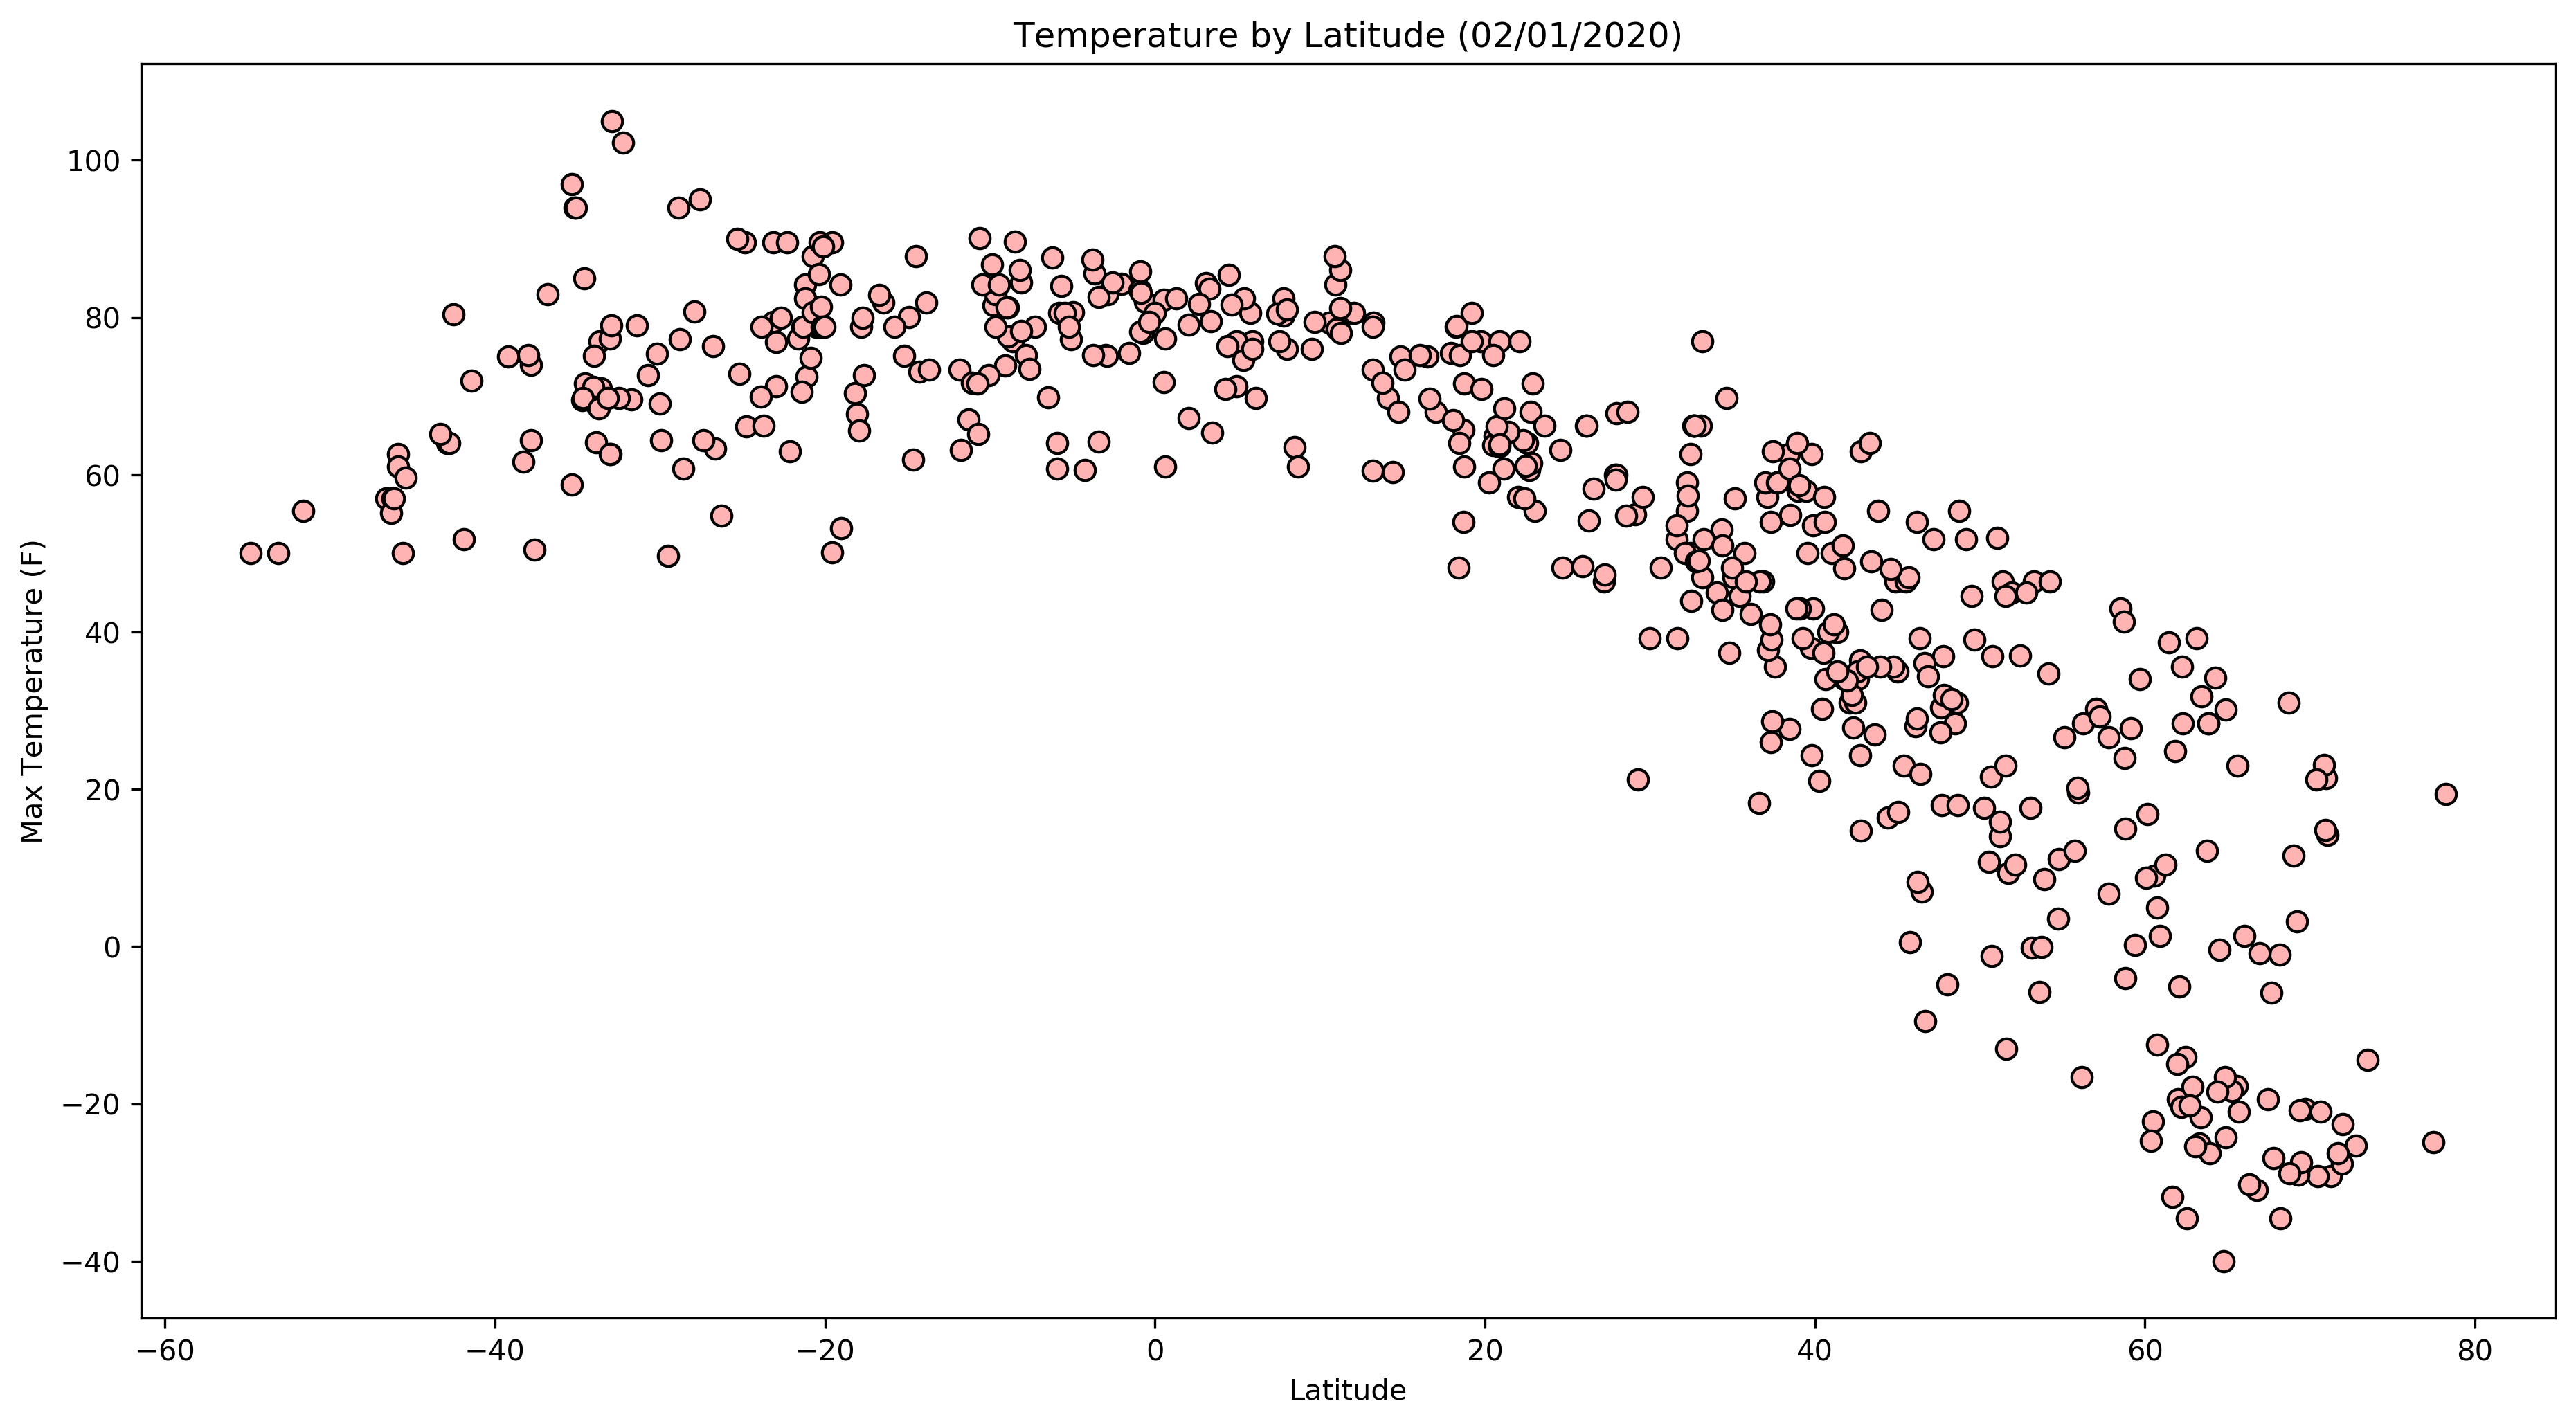

In [61]:
plt.figure(figsize=(15, 8), dpi=300)
plt.scatter(data_df["Lat"], data_df["Max Temp"], marker="o",c='#ffb3b3',edgecolors='black',s=50)

plt.title("Temperature by Latitude (02/01/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(False)
plt.savefig("Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

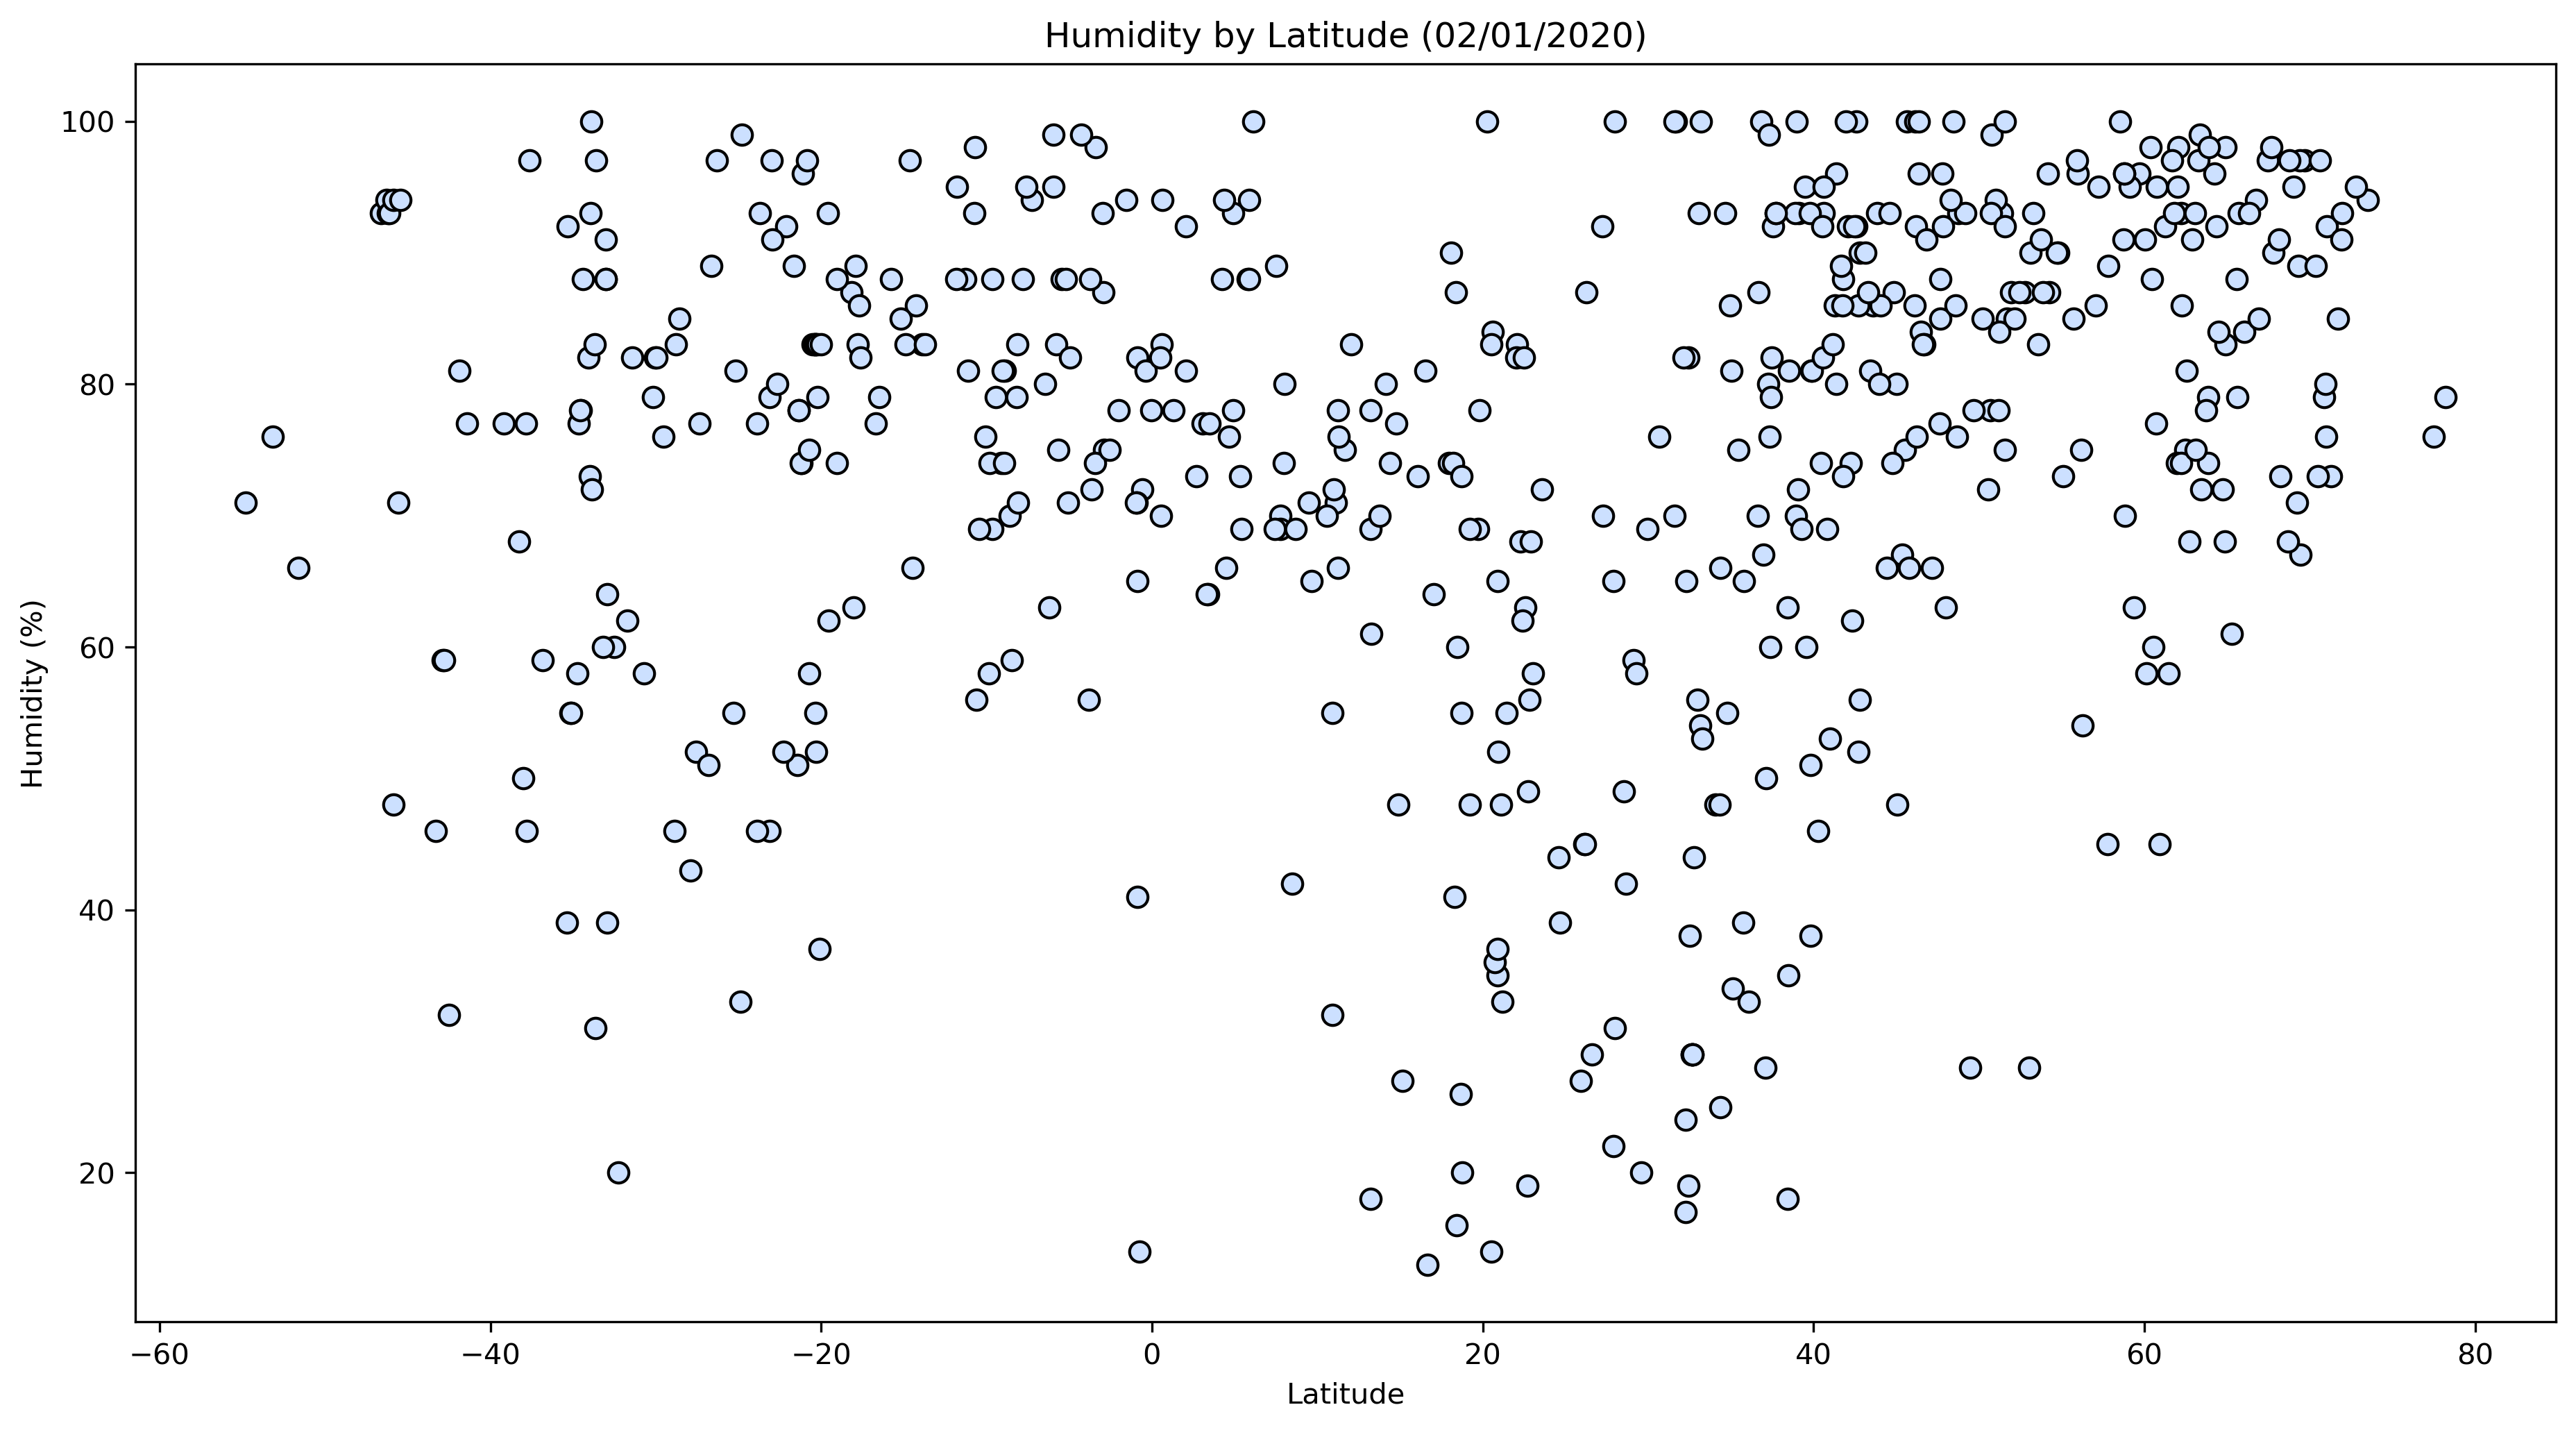

In [62]:
plt.figure(figsize=(15, 8), dpi=300)
plt.scatter(data_df["Lat"], data_df["Humidity"], marker="o",c='#cce0ff',edgecolors='black',s=50)

plt.title("Humidity by Latitude (02/01/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(False)
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

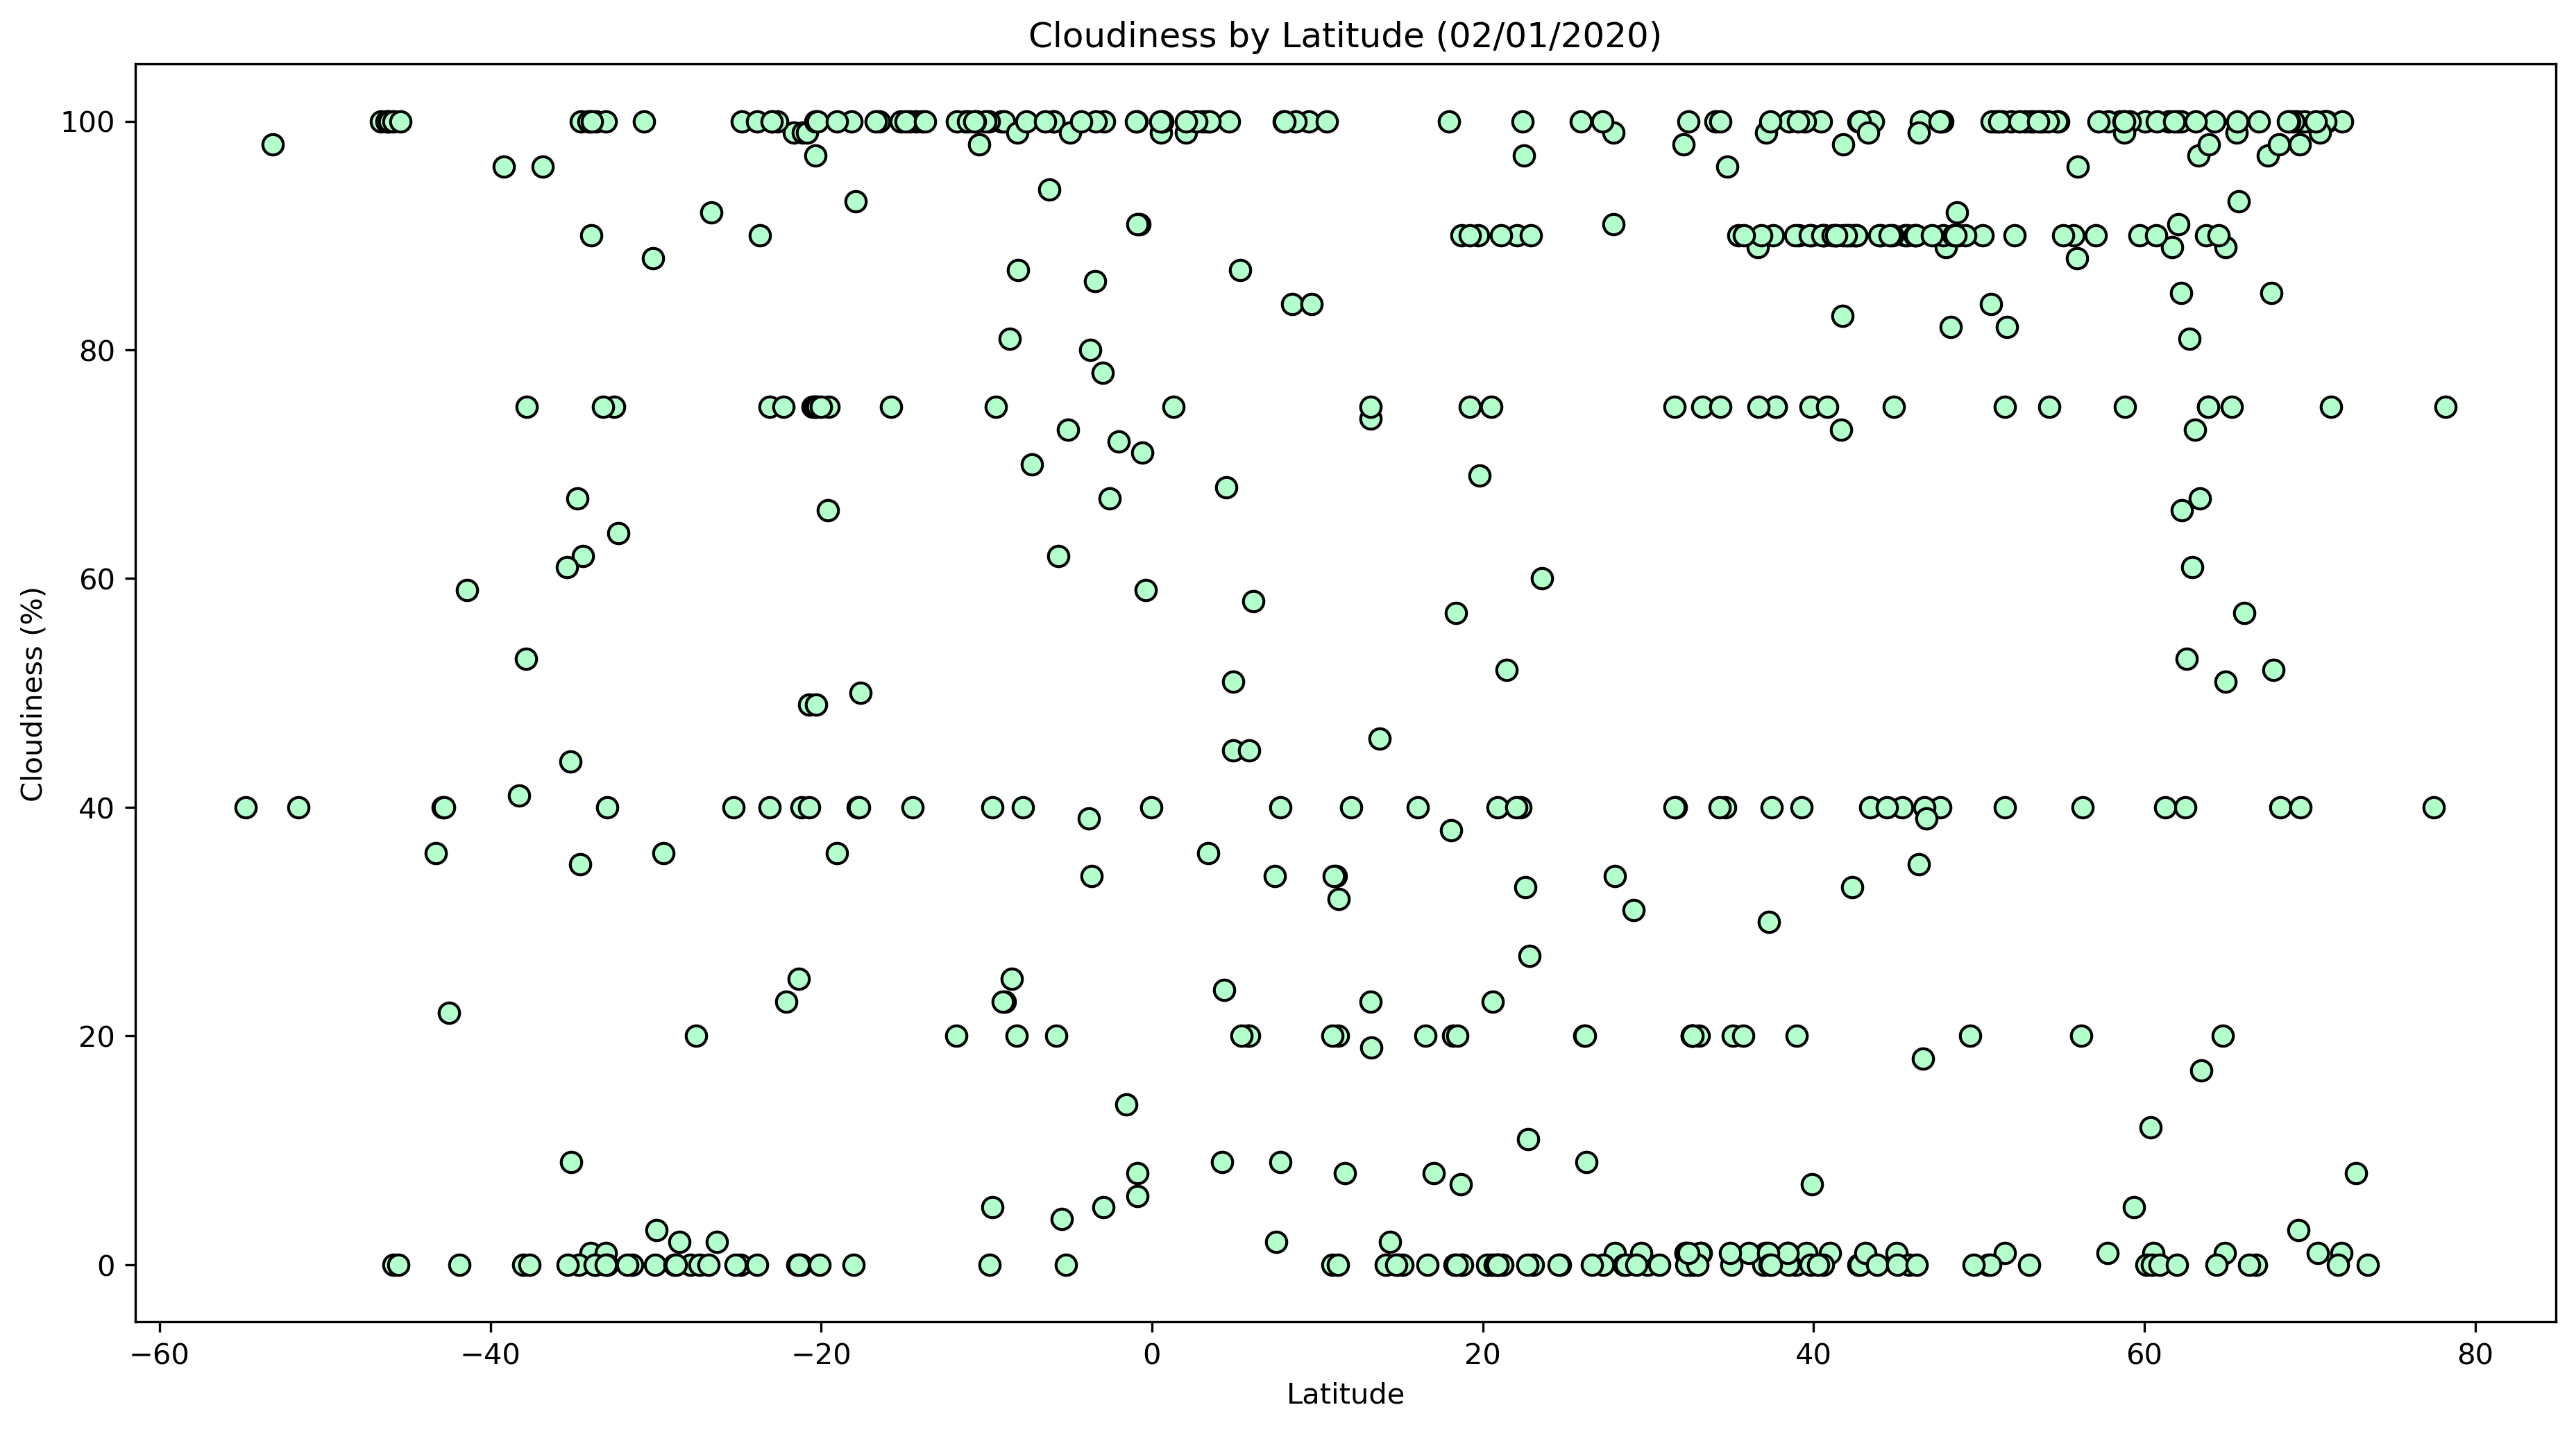

In [66]:
plt.figure(figsize=(15, 8), dpi=300)
plt.scatter(data_df["Lat"], data_df["Cloudiness"], marker="o",c='#b3ffcc',edgecolors='black',s=50)

plt.title("Cloudiness by Latitude (02/01/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(False)
plt.savefig("Cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

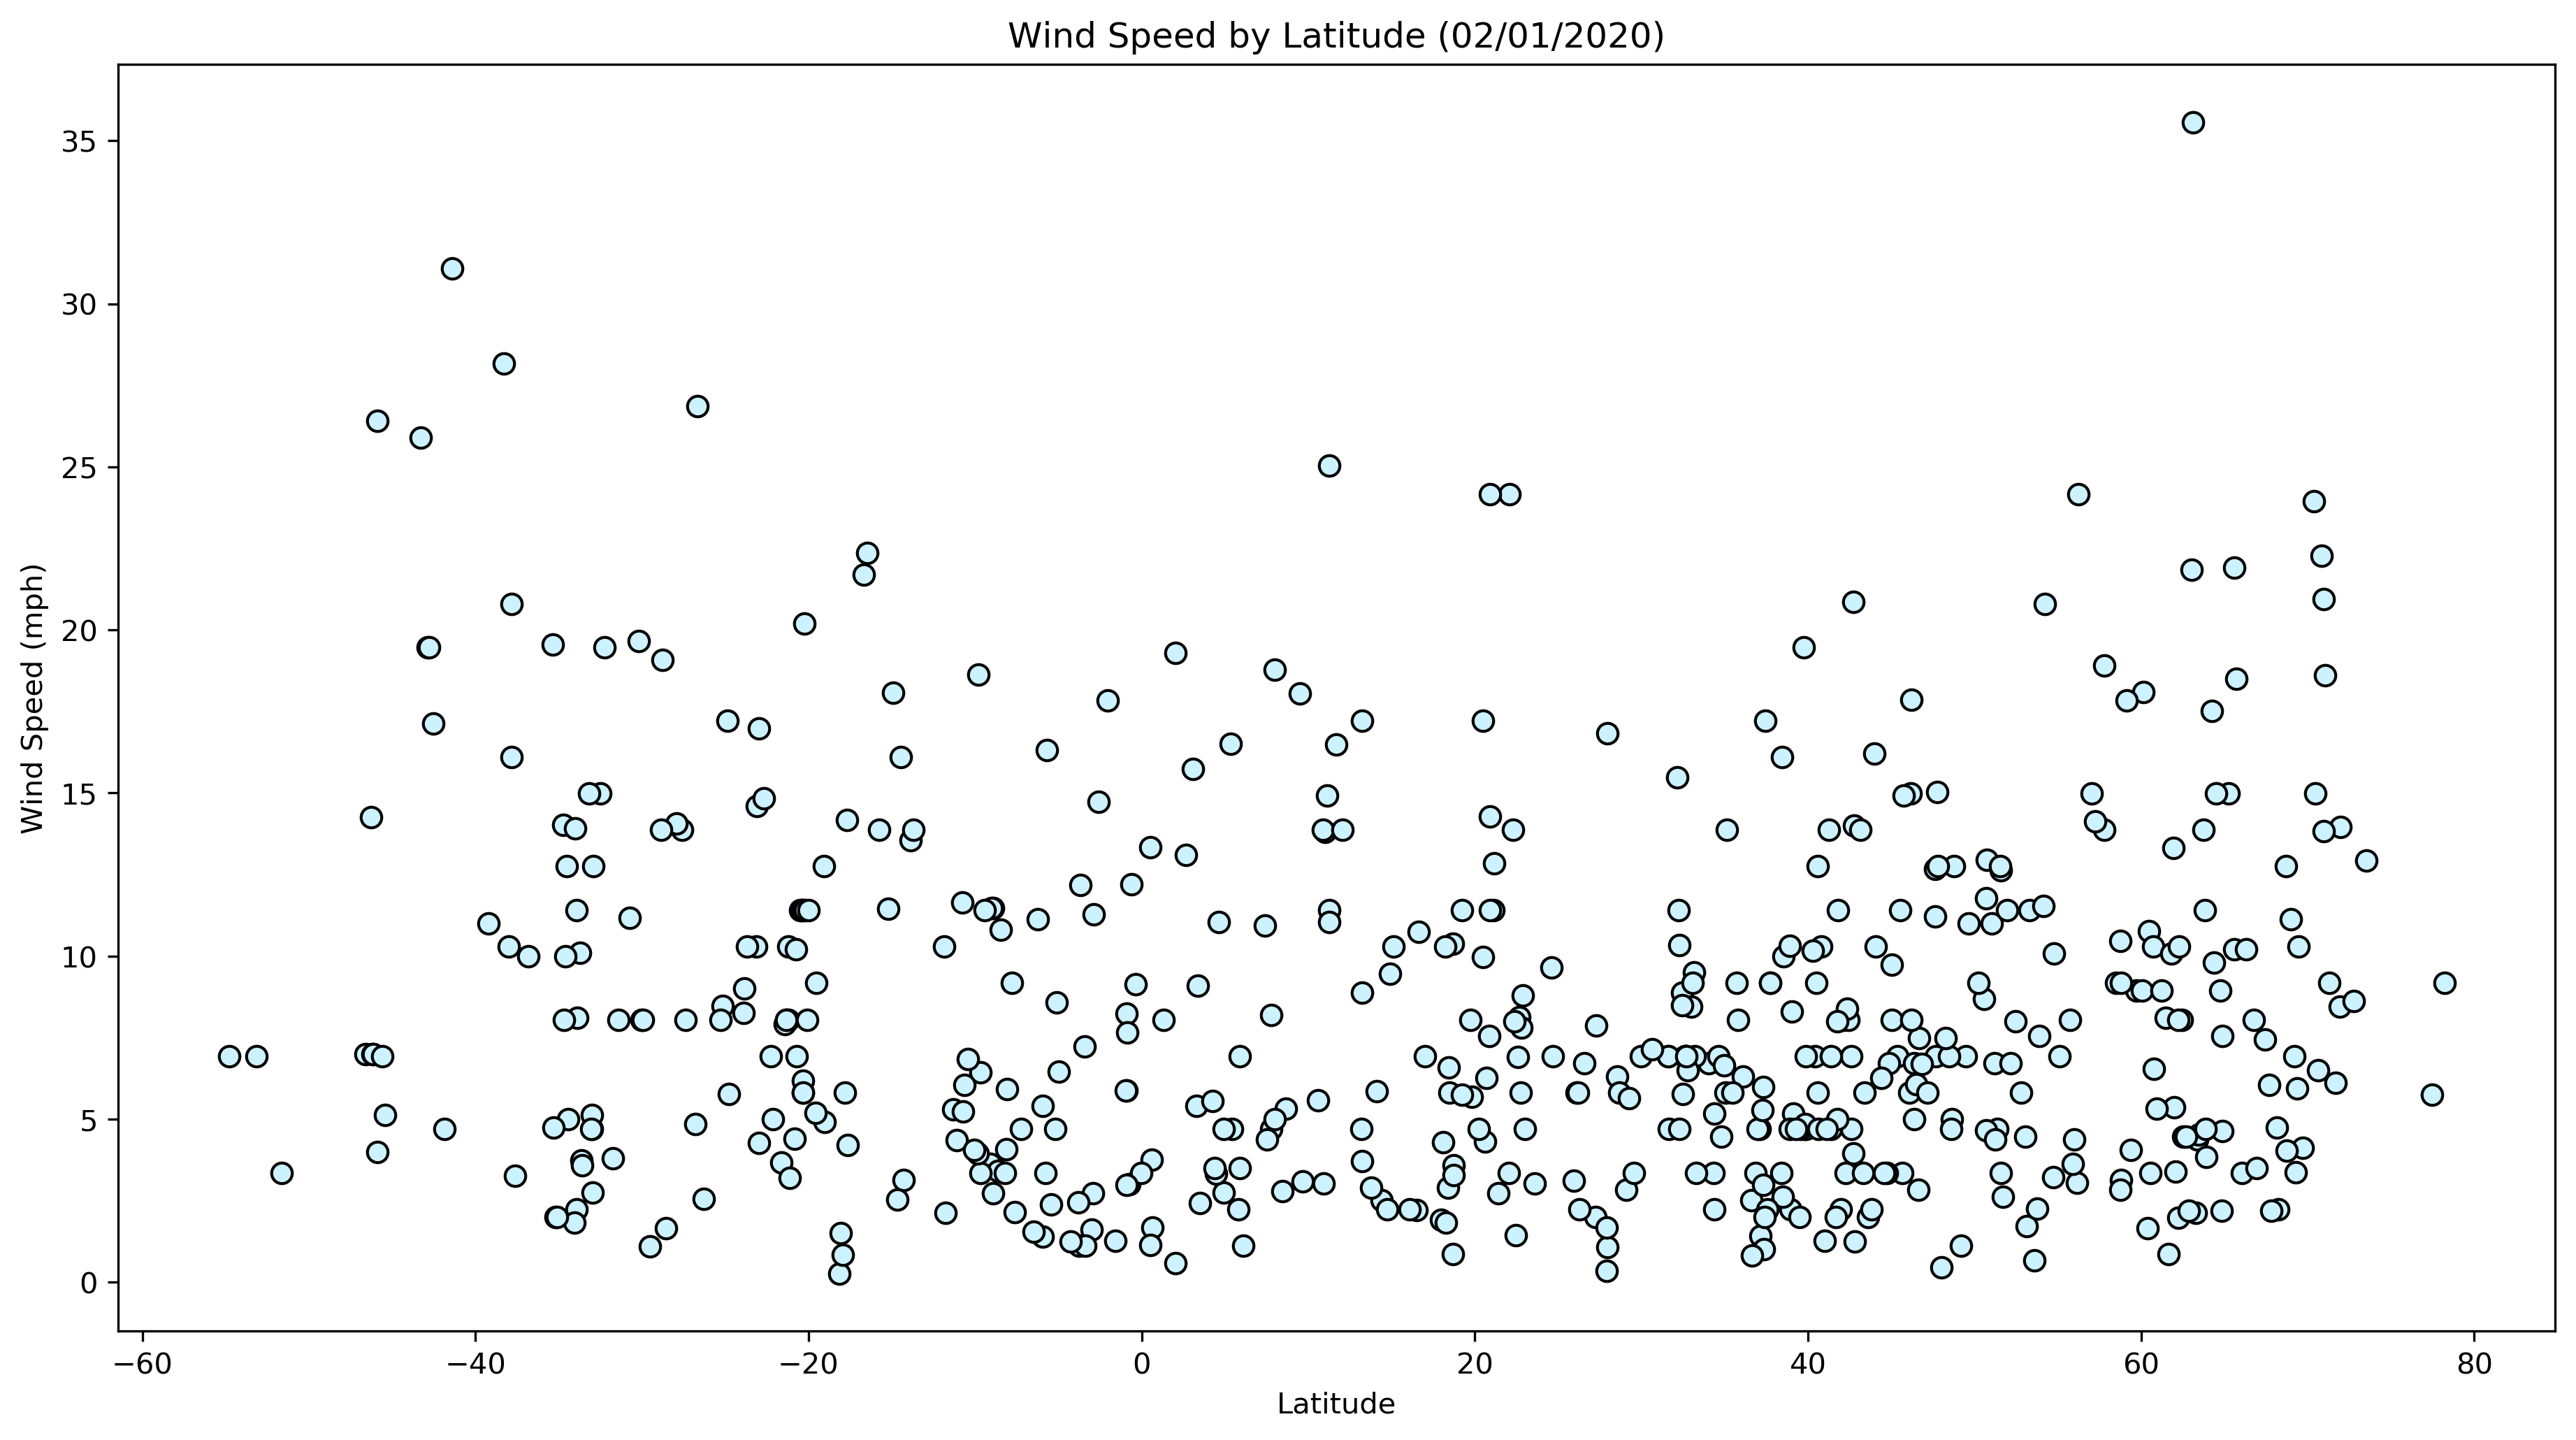

In [67]:
plt.figure(figsize=(15, 8), dpi=300)
plt.scatter(data_df["Lat"], data_df["Wind Speed"], marker="o",c='#ccf2ff',edgecolors='black',s=50)

plt.title("Wind Speed by Latitude (02/01/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(False)
plt.savefig("Wind.png")
plt.show()

## Observations
Temperature appears to be only variables that is very visibly impacted by location distance relative to the equator. Humidity, Cloudiness and Windspeed are not impacted by location relative to the equator.

Cities below the equator tend to be warmer than cities with the same corresponding distance above the equator.

Interestingly, the hottest cities were not in the equator but rather approximately 30 degrees below the equator. Which would indicate that other factors and not just location plays an important role in temparature as well.